# What is this notebook? 

This is just a notebook for testing libraries and functions that will eventually be turned into a script.

In [4]:
import duckdb
import polars as pl

from ml_final_project.config import RAW_DATA_DIR, PROCESSED_DATA_DIR, INTERIM_DATA_DIR

In [2]:
dbPath = RAW_DATA_DIR / "CivilServiceCommission" / "civilservicecommission.duckdb"

db = duckdb.connect(dbPath, read_only=True)

In [10]:
data = (
    db.sql("SELECT * FROM civilservicecommission")
    .pl()
    .unique(subset=["Action"])
    .with_columns([pl.col("Action").cast(pl.Int32).alias("Action")])
)

data

Agency,Region,Position Title,Plantilla Item No.,Posting Date,Closing Date,Action
str,str,str,str,str,str,i32
"""DEPARTMENT OF EDUCATION""","""Region XI""","""Administrative Assistant II (A…","""OSEC-DECSB-ADAS2-750035-2016""","""08 Jan 2025""","""20 Jan 2025""",4266888
"""DEPARTMENT OF EDUCATION""","""Region VI""","""TEACHER III""","""OSEC-DECSB-TCH3-420004-2009""","""04 Feb 2025""","""17 Feb 2025""",4320062
"""DEPARTMENT OF EDUCATION""","""Region VI""","""Teacher III (Elementary)""","""OSEC-DECSB-TCH3-420848-2015""","""09 Dec 2024""","""20 Dec 2024""",4237574
"""DEPARTMENT OF EDUCATION""","""Region III""","""Master Teacher I""","""OSEC-DECSB-MTCHR1-151363-1998""","""06 Jan 2025""","""16 Jan 2025""",4269105
"""MOUNTAIN PROVINCE STATE POLYTE…","""CAR""","""Administrative Officer III (Re…","""MTPSPCB-ADOF3-31-2023""","""03 Dec 2024""","""17 Dec 2024""",4230051
…,…,…,…,…,…,…
"""PUBLIC ATTORNEY S OFFICE""","""NCR""","""PUBLIC ATTORNEY I""","""PATTY1-68-2009""","""02 Jan 2025""","""13 Jan 2025""",4259663
"""MANILA, NCR""","""NCR""","""ARCHITECT IV""","""263""","""10 Mar 2025""","""25 Mar 2025""",4378032
"""VICENTE SOTTO MEMORIAL MEDICAL…","""Region VII""","""NURSE I""","""OSEC-DOHB-NUR1-510473-2021""","""06 Mar 2025""","""16 Mar 2025""",4371019


In [11]:
pdfDbPath = INTERIM_DATA_DIR / "CivilServiceCommission" / "civilservicecommission_pdfs.duckdb"

pdfDb = duckdb.connect(pdfDbPath, read_only=True)
pdfData = pdfDb.sql("SELECT * FROM civilservicecommission_pdfs").pl()
pdfData

jobId,Agency,PlaceOfAssignment,PositionTitle,PlantillaNo,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency
i32,str,str,str,str,str,i32,str,str,str,str,str
3488662,"""DEPARTMENT OF EDUCATION""","""Curriculum and Learning Manage…","""Education Program Supervisor""","""OSEC-DECSB-EPSVR-540087-2010""","""22""",71511,"""RA 1080 (Teacher)""","""Program Supervisor""","""8 hours of relevant training""","""2 years as Principal or 2 year…","""NA"""
3488663,"""DEPARTMENT OF EDUCATION""","""Curriculum and Learning Manage…","""Administrative Assistant II (C…","""OSEC-DECSB-ADAS2-540099-2004""","""8""",19744,"""Career Service (Subprofessiona…","""Completion of two years studie…","""4 hours of relevant training""","""1 year of relevant experience""","""NA"""
3577829,"""CGO PASSI, ILOILO""","""Office of the City Assessor""","""Assistant City Assessor I""","""2""","""23""",68003,"""RA 1080 (Real Estate Service)""","""Bachelor's degree preferably i…","""None required""","""3 years experience in real pro…","""- must have knowledge in Appra…"
3584545,"""WEST VISAYAS STATE UNIVERSITY""","""College of Medicine""","""Administrative Aide VI (Clerk …","""WVSUB-ADA6-6-2022""","""6""",18255,"""Career Service (Subprofessiona…","""Completion of two years studie…","""None Required""","""None Required""","""1. Attention to details 2. Com…"
3619486,"""DEPARTMENT OF EDUCATION""","""WITHIN SCHOOLS DIVISION OF OLO…","""Administrative Assistant II""","""OSEC-DECSB-ADAS2-150376-2016""","""8""",19744,"""Career Service (Sub-Profession…","""Completion of 2 years studies …","""4 hours of relevant training""","""1 year of relevant experience""","""NONE"""
…,…,…,…,…,…,…,…,…,…,…,…
4397213,"""DEPARTMENT OF EDUCATION""","""DepEd Mandaue""","""PROJECT DEVELOPMENT OFFICER II""","""PDO2-510042-2015""","""15""",40208,"""Career Service (Professional) …","""Bachelor's Degree relevant to …","""4 hours of relevant training""","""1 year of relevant experience""",""""""
4397214,"""DEPARTMENT OF EDUCATION""","""DepEd Mandaue""","""TEACHER III (SECONDARY)""","""TCH3-510528-2019""","""13""",34421,"""RA 1080 Teacher""","""Bachelor of Secondary""","""None required""","""Two (2) years relevant experie…",""""""
4397215,"""DEPARTMENT OF EDUCATION""","""DepEd Mandaue""","""ADMINISTRATIVE ASSISTANT III""","""ADAS3-510286-2017""","""9""",23226,"""Career Service (Sub-profession…","""Completion of two years studie…","""4 hours of relative training""","""1 year of relevant experience""",""""""


In [16]:
joined_data = pdfData.join(data, left_on="jobId", right_on="Action", how="inner")
joined_data.head(1)

jobId,Agency,PlaceOfAssignment,PositionTitle,PlantillaNo,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency,Agency_right,Region,Position Title,Plantilla Item No.,Posting Date,Closing Date
i32,str,str,str,str,str,i32,str,str,str,str,str,str,str,str,str,str,str
4266888,"""DEPARTMENT OF EDUCATION""","""Any Senior High School within …","""Administrative Assistant II (A…","""OSEC-DECSB-ADAS2-750035-2016""","""8""",20534,"""Career Service (Subprofessiona…","""Completion of 2 years studies …","""4 hours of relevant training""","""1 year of relevant experience""","""Self-Management, Professionali…","""DEPARTMENT OF EDUCATION""","""Region XI""","""Administrative Assistant II (A…","""OSEC-DECSB-ADAS2-750035-2016""","""08 Jan 2025""","""20 Jan 2025"""


In [35]:
formatted_joined_data = (
    joined_data.drop(["Agency", "PositionTitle", "PlantillaNo"])
    .with_columns(
        [
            pl.col("Agency_right").alias("Agency"),
        ]
    )
    .drop(["Agency_right"])
    .with_columns(
        [
            pl.col("Posting Date")
            .str.strptime(pl.Date, "%d %b %Y")  # Convert from "20 Apr 2025"
            .alias("Posting Date"),
            pl.col("Closing Date")
            .str.strptime(pl.Date, "%d %b %Y")  # Convert from "20 Apr 2025"
            .alias("Closing Date"),
        ]
    )
    .select([
        pl.col("jobId"),
        pl.col("Agency"),
        pl.col("Region"),
        pl.col("PlaceOfAssignment"),
        pl.col("Posting Date"),
        pl.col("Closing Date"),
        pl.col("Position Title"),
        pl.col("SalaryGrade"),
        pl.col("MonthlySalary"),
        pl.col("Eligibility"),
        pl.col("Education"),
        pl.col("Training"),
        pl.col("Experience"),
        pl.col("Competency"),
        pl.col("Plantilla Item No."),
    ])
).unique(subset=["jobId"])
formatted_joined_data

jobId,Agency,Region,PlaceOfAssignment,Posting Date,Closing Date,Position Title,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency,Plantilla Item No.
i32,str,str,str,date,date,str,str,i32,str,str,str,str,str,str
4307309,"""MINISTRY OF BASIC, HIGHER AND …","""BARMM""","""Lanao Del Sur I""",2025-01-23,2025-02-03,"""TEACHER I""","""11""",28512,"""R.A1080 (Teacher)""","""Bachelor of Elementary""","""None required""","""None required""","""N/A""","""ARMMB-TCH1-2408-1998"""
4238501,"""PGO ALBAY""","""Region V""","""Rapu-Rapu District Hospital""",2024-12-09,2024-12-26,"""Medical Officer III""","""21""",67005,"""RA 1080""","""Doctor of Medicine""","""None required""","""None required""","""""","""013-1041"""
4251997,"""DEPARTMENT OF EDUCATION""","""Region VIII""","""Southern Leyte Division""",2024-12-23,2025-01-02,"""Teacher II (SHS; Acad)""","""12""",30705,"""Applicants for permanent appoi…","""Bachelor's degree with a major…","""None required""","""None required""","""""",""".OSEC-DECSB-TCH2-540181-2019"""
4319215,"""BUREAU OF CORRECTIONS""","""NCR""","""Bureau of Corrections""",2025-01-14,2025-01-24,"""Corrections Technical Senior O…","""19""",38366,"""RA 1080/ CS Professional/ CSC …","""Bachelor's degree relevant to …","""Senior Corrections Technical S…","""2 years as Corrections Technic…","""N/A""","""BCORB-CTSO4-460-2018-ARF"""
4224183,"""PGO CAPIZ""","""Region VI""","""Provincial Budget Office""",2024-11-27,2024-12-13,"""Administrative Officer IV (Bud…","""15""",38413,"""Career Service (Professional)/…","""Bachelor's degree relevant to …","""4 hours of relevant training""","""1 year of relevant experience""","""N/A""","""9"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4295471,"""DEPARTMENT OF EDUCATION""","""NCR""","""ELEM""",2025-01-20,2025-01-30,"""TEACHER III""","""13""",32870,"""RA 1080 (Teacher)""","""Bachelor of Elementary""","""None required""","""2 years of relevant experience""","""""","""OSEC-DECSB-TCH3-31437-2016"""
4335834,"""DEPARTMENT OF EDUCATION""","""Region XI""","""Division of Davao del Sur - Se…",2025-02-13,2025-02-23,"""TEACHER II (Senior High School…","""12""",32245,"""Regular Applicants for a perma…","""*TVL Track -Bachelor's degree …","""*TVL Track -At least NC II * +…","""*TVL Track-6 mos. of relevant …","""N/A""","""OSEC-DECSB-TCH2-750941-2023"""
4378442,"""MGO SARIAYA, QUEZON""","""Region IV""","""Office of the Municipal Engine…",2025-03-11,2025-03-26,"""Administrative Aide IV (Driver…","""4""",14588,"""Driver License (MC 11, S. 96-C…","""Elementary School Graduate""","""None required""","""None required""","""n/a""","""8751-15"""


Details column in the table is a button with text value "Details". However, the information we want is the id, which is a dynamically named attribute of the button id="info_{jobId}", we want to get this jobId value, so that we can get the associating job request PDF at https://csc.gov.ph/career/job/{jobId}

In [17]:
data['Region'].value_counts()

Region,count
str,u32
"""Central Office (CO)""",21
"""Region I""",5300
"""Region XI""",5600
"""CAR""",2479
"""CARAGA""",5149
…,…
"""Region X""",5521
"""Region VIII""",5689
"""Region II""",4532


In [22]:
data["Position Title"].value_counts().sort(by="count")

Position Title,count
str,u32
"""Senior Cooperatives Developmen…",1
"""City Government Department Hea…",1
"""TRUCK DRIVER""",1
"""MASTER TEACHER I (Sr.HS) for A…",1
"""TEACEHR III""",1
…,…
"""Teacher II""",3076
"""Teacher I""",3535
"""TEACHER III""",3784


In [11]:
data["Position Title"].value_counts()

Position Title
TEACHER I                                                                                4439
TEACHER III                                                                              3128
Teacher I                                                                                3026
TEACHER II                                                                               3000
Teacher II                                                                               2587
                                                                                         ... 
SUPERVISING IRRIGATORS DEVELOPMENT OFFICER                                                  1
PROVINCIAL GOVERNMENT ASSISTANT DEPARTMENT HEAD (ASSISTANT PROVINCIAL TREASURER)            1
Senior Administrative Assistant I (Data Controller IV))                                     1
Provincial Government Assistant Department Head (Assistant Provincial Budget Officer)       1
SPECIAL SCIENCE TEACHER I - SHS              

In [ ]:
data.group_by()

In [25]:
data.with_columns([
    pl.col("Posting Date").str.strptime(pl.Date, format="%d/%m/%Y").alias("Posting Date"),
])

InvalidOperationError: conversion from `str` to `date` failed in column 'Posting Date' for 133942 out of 133942 values: ["10 Apr 2025", "10 Apr 2025", … "08 Jan 2000"]

You might want to try:
- setting `strict=False` to set values that cannot be converted to `null`
- using `str.strptime`, `str.to_date`, or `str.to_datetime` and providing a format string

In [7]:
import pdfplumber


pdf_path = RAW_DATA_DIR / "CivilServiceCommission" / "pdfs"

with pdfplumber.open(pdf_path / "test.pdf") as pdf:
    page_container = []

    for page in pdf.pages:
        text = page.extract_text()
        page_container.extend(text.split("\n"))

page_container

['CSC Job Portal',
 'MGO TINGLOY, BATANGAS | Region IV',
 'Place of Assignment : Tingloy, Batangas RO IV',
 'Position Title : Municipal Government Assistant Department Head (Assistant',
 'Municipal Treasurer)',
 'Plantilla Item No. : 2025-047',
 'Salary/Job/Pay Grade : 24',
 'Monthly Salary : Php 56,127.00',
 'Eligibility : Career Service Professional (Second Level Eligibility)',
 'Education : Bachelors Degree',
 'Training : 16hours of relevant Training',
 'Work Experience : Three(3) years relevant experience',
 'Competency : N/A',
 'Instructions/Remarks :',
 'Interested and qualified applicants should signify their interest in writing. Attach the following documents',
 'to the application letter and send to the address below not later than May 7, 2025',
 'Documents:',
 '1. Fully accomplished Personal Data Sheet (PDS) with recent passport-sized picture (CS Form No. 212,',
 'Revised 2017) which can be downloaded at www.csc.gov.ph;',
 '2. Performance rating in the last rating period (if 

In [12]:
def extract_from_list(page_container: list, key: str) -> str | None:
    try:
        for line in page_container:
            if key in line:
                # Extract the value after the key
                value = line.split(key)[1].strip().replace(":", "").strip()
                return value

    except ValueError:
        return []
    
extract_from_list(page_container, "Place of Assignment")

'Tingloy, Batangas RO IV'

In [ ]:
insert_query = """
INSERT INTO civilservicecommission_pdfs (Posting Date, Agency, Region, Position Title, Salary Grade, Place of Assignment)
VALUES (?, ?, ?, ?, ?, ?)
"""
with duckdb.connect(dbPath) as conn:
    conn.execute(insert_query, (posting_date, agency, region, position_title, salary_grade, place_of_assignment))

In [16]:
first_page.extract_text_simple().split("\n")

['CSC Job Portal',
 'MGO TINGLOY, BATANGAS | Region IV',
 'Place of Assignment : Tingloy, Batangas RO IV',
 'Position Title : Municipal Government Assistant Department Head (Assistant',
 'Municipal Treasurer)',
 'Plantilla Item No. : 2025-047',
 'Salary/Job/Pay Grade : 24',
 'Monthly Salary : Php 56,127.00',
 'Eligibility : Career Service Professional (Second Level Eligibility)',
 'Education : Bachelors Degree',
 'Training : 16hours of relevant Training',
 'Work Experience : Three(3) years relevant experience',
 'Competency : N/A',
 'Instructions/Remarks :',
 'Interested and qualified applicants should signify their interest in writing. Attach the following documents',
 'to the application letter and send to the address below not later than May 7, 2025',
 'Documents:',
 '1. Fully accomplished Personal Data Sheet (PDS) with recent passport-sized picture (CS Form No. 212,',
 'Revised 2017) which can be downloaded at www.csc.gov.ph;',
 '2. Performance rating in the last rating period (if 

In [45]:
from pypdf import PdfReader

reader = PdfReader(pdf_path / "test.pdf")
page = reader.pages[0]
reader.get_form_text_fields()

{}

In [12]:
import requests
jobId = 4396735

requests.get(f"https://csc.gov.ph/career/job/{jobId}/").text

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n<title>Attention Required! | Cloudflare</title>\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />\n<!--[if lt IE 9]><link rel="stylesheet" id=\'cf_styles-ie-css\' href="/cdn-cgi/styles/cf.errors.ie.css" /><![endif]-->\n<style>body{margin:0;padding:0}</style>\n\n\n<!--[if gte IE 10]><!-->\n<script>\n  if (!navigator.cookieEnabled) {\n    window.addEventListene

In [ ]:
from itertools import count

counter = count(1)



count(2)
count(2)


In [20]:
dbPath = (
    PROCESSED_DATA_DIR
    / "CivilServiceCommission"
    / "civilservicecommission_pdfs.duckdb"
)

db = duckdb.connect(dbPath, read_only=True)

In [21]:
pdfs = db.sql("SELECT * FROM civilservicecommission_pdfs").pl()

In [22]:
pdfs

jobId,LocalRegion,PlaceOfAssignment,PositionTitle,PlantillaNo,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency
i32,str,str,str,str,i32,i32,str,str,str,str,str
3620203,"""DEPARTMENT OF EDUCATION""","""Cayapa NHS""","""Teacher I""",null,null,27000,"""TR./PBET/LET/RA 1080""","""BSED or its equivalent""","""None Required""","""None Required""","""Teaching Learning Process; Stu…"
3734502,"""CIVIL SERVICE COMMISSION""","""CSC NCR""","""Personnel Specialist I (Human …",null,null,34421,"""Career Service Professional/ S…","""Bachelor’s Degree""","""None Required""","""None Required""",""""""
4207888,"""CGO LAOAG CITY (CAPITAL)""","""Office of the City Human Resou…","""Administrative Assistant I""",null,null,17429,"""None Required (MC 11, s. 1996 …","""Elementary School Graduate""","""None Required""","""None Required""","""Memory, Stamina, Technology ap…"
4217931,"""PGO BATANES""","""Proviincial Gov't of Batanes/P…","""Provincial Government Departme…",null,null,121146,"""Career Service Professional/Se…","""Bachelor's degree in tourism, …","""DOT specific and mandatory tra…","""Five years of work experience …","""n/a"""
4218644,"""LOCAL WATER UTILITIES ADMINIST…","""Office of the Administrator/Le…","""Department Manager A""",null,null,131124,"""Career Service Professional/Se…","""Master's degree or Certificate…","""40 hours of Mandatory Continui…","""5 years of supervisory/managem…",""""""
…,…,…,…,…,…,…,…,…,…,…,…
4396252,"""DEPARTMENT OF EDUCATION""","""SENIOR HIGH SCHOOLS within the…","""TEACHER I""",null,null,30024,"""RA 1080 (Teacher) Secondary;if…","""Bachelor's degree; or completi…","""at least NC II Appropriate to …","""None required""","""N/A"""
4396253,"""DEPARTMENT OF EDUCATION""","""SENIOR HIGH SCHOOLS within the…","""TEACHER I""",null,null,30024,"""RA 1080 (Teacher) Secondary;if…","""Bachelor's degree; or completi…","""at least NC II Appropriate to …","""None required""","""N/A"""
4396254,"""DEPARTMENT OF EDUCATION""","""SENIOR HIGH SCHOOLS within the…","""TEACHER I""",null,null,30024,"""RA 1080 (Teacher) Secondary;if…","""Bachelor's degree; or completi…","""at least NC II Appropriate to …","""None required""","""N/A"""


In [29]:
pdfs.filter(pl.col("MonthlySalary") == 0)

jobId,LocalRegion,PlaceOfAssignment,PositionTitle,PlantillaNo,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency
i32,str,str,str,str,i32,i32,str,str,str,str,str
4221315,"""MGO GIGAQUIT, SURIGAO DEL NORT…","""LGU-Gigaquit, Surigao del Nort…","""Municipal Government Departmen…",null,null,0,"""RA 1080 (Engineer)""","""Bachelor's Degree in Civil Eng…","""None required""","""3 years experience in the prac…",""""""
4230802,"""DEPARTMENT OF EDUCATION""","""SDO MAKATI""","""ADMINISTRATIVE AIDE III""",null,null,0,"""None required (MC 11, s. 1996-…","""Elementary School graduate""","""None required""","""None required""",""""""
4231962,"""DEPARTMENT OF EDUCATION""","""Division of San Carlos City""","""EDUCATION PROGRAM SPECIALIST I…",null,null,0,"""RA 1080; Career Service (Profe…","""Bachelor's degree in""","""4 hours of relevant training""","""2 years experience in educatio…",""""""
4240800,"""SAN FRANCISCO WATER DISTRICT""","""Office""","""Utilities/Customer Services As…",null,null,0,"""Career Service (Subprofessiona…","""Completion of Two Years Studie…","""Eight (8) Hours of Relevant""","""Two (2) Years of Relevant""","""* Competent in Geographic Info…"
4243751,"""MGO SAN LUIS, AURORA""","""Office of the Municipal Mayor""","""Disability Affairs Officer I""",null,null,0,"""Career Service (Professional)S…","""Bachelor's Degree""","""none required""","""none required""",""""""
…,…,…,…,…,…,…,…,…,…,…,…
4391508,"""BANGKO SENTRAL NG PILIPINAS""","""Investment Management Staff, R…","""Reserve Management Specialist""",null,null,0,"""Career Service (Professional) …","""Bachelor's degree in Economics…","""Certified Treasury Professiona…","""None required""",""""""
4391509,"""BANGKO SENTRAL NG PILIPINAS""","""Settlement Services Division I…","""Settlement Services Specialist""",null,null,0,"""Career Service (Professional) …","""Bachelor?s degree relevant to …","""8 hours of relevant training/l…","""2 years of relevant experience""",""""""
4394145,"""BANGKO SENTRAL NG PILIPINAS""","""Security Policy and Planning D…","""Special Investigator II""",null,null,0,"""Career Service (Professional) …","""Bachelor's degree""","""4 hours of relevant training/l…","""1 year of relevant experience""","""-"""


In [28]:
pdfs.describe()

statistic,jobId,LocalRegion,PlaceOfAssignment,PositionTitle,PlantillaNo,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency
str,f64,str,str,str,str,f64,f64,str,str,str,str,str
"""count""",27668.0,"""27668""","""27668""","""27668""","""0""",0.0,27668.0,"""27668""","""27668""","""27668""","""27668""","""27668"""
"""null_count""",0.0,"""0""","""0""","""0""","""27668""",27668.0,0.0,"""0""","""0""","""0""","""0""","""0"""
"""mean""",4.3499e6,null,null,null,null,null,37493.641969,null,null,null,null,null
"""std""",50438.392076,null,null,null,null,null,29116.767666,null,null,null,null,null
"""min""",3.620203e6,"""(CGO PASAY NCR)""","""""","""""",null,null,0.0,"""""","""""","""""","""""",""""""
"""25%""",4.316479e6,null,null,null,null,null,27000.0,null,null,null,null,null
"""50%""",4.37606e6,null,null,null,null,null,32245.0,null,null,null,null,null
"""75%""",4.387071e6,null,null,null,null,null,41616.0,null,null,null,null,null
"""max""",4.396256e6,"""ZAMBOANGA STATE COLLEGE OF MAR…","""sumisip, basilan""","""two (2)Administrative Aide I (…",null,null,1.8231e6,"""ÿR.A. 1080 (Board Passed of En…","""| Region VIII""","""sixteen (16) hours of relevant…","""two (2) years of relevant expe…","""• Exemplifying Integrity"""


In [26]:
pdfs["MonthlySalary"].max()

1823100

(0.0, 200000.0)

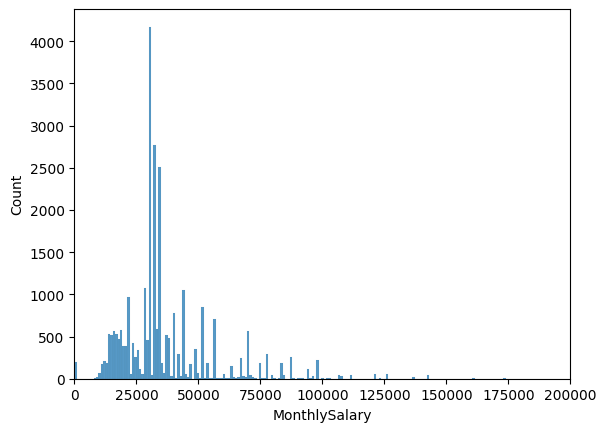

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=pdfs, x="MonthlySalary")
plt.xlim(0, 200000)

In [35]:
db.close()